In [6]:
import cv2, math, warnings
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
from nail_meta import *
warnings.filterwarnings('ignore')

raw_mask = cv2.imread("hand_mask.jpg")
raw_hand = cv2.imread("hand_raw.jpg")
raw_nail = cv2.imread("nail.jpg")
finger_list = []

# 얘는 한 번만 해도 될듯
raw_mask_ct = Contours(raw_mask)

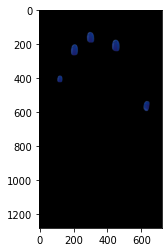

In [7]:
for i in range(5):
    finger_num = i
    img, point, index = find_point(cv2.cvtColor(raw_hand, cv2.COLOR_BGR2RGB))
    rotation_finger(cv2.cvtColor(raw_hand, cv2.COLOR_BGR2RGB), point)
    rot_mask_output = rotation_mask(raw_mask, point)

    target_mask = rot_mask_output[finger_num]
    resized_img_nail = cv2.resize(raw_nail, (target_mask.shape[1],target_mask.shape[0]))
    resized_img_nail = np.where(resized_img_nail>190, 0, resized_img_nail)

    #################

    n_pts1, n_pts2, n_pts3 = nail_pts(resized_img_nail)
    m_pts1, m_pts2, m_pts3 = nail_pts(target_mask)


    #################


    rows, cols = resized_img_nail.shape[:2]

    # 변환 전
    before_pts = np.float32([n_pts1, n_pts2, n_pts3])
    # 변환 후
    after_pts = np.float32([m_pts1, m_pts2, m_pts3])

    mtrx = cv2.getAffineTransform(before_pts, after_pts)
    dst = cv2.warpAffine(resized_img_nail, mtrx, (cols, rows))



    ##################



    dst_ct = Contours(dst)
    resized_croppedRotated = cv2.resize(rot_crop_box(dst)[0],(raw_hand.shape[1],raw_hand.shape[0]))

    ###################



    cnt = raw_mask_ct[finger_num]
    # Rotated Rectangle
    rect = cv2.minAreaRect(cnt)
    hand_box = cv2.boxPoints(rect)
    hand_box = np.int0(hand_box)

    ###################


    rows, cols = raw_hand.shape[:2]
    final_before = np.float32([ [0, 0], [cols, 0], [0, rows], [cols, rows] ])
    # 변환 후
    final_after = np.float32([hand_box[1], hand_box[2],hand_box[0],hand_box[3]])

    mtrx2 = cv2.getPerspectiveTransform(final_before, final_after)
    dst2 = cv2.warpPerspective(resized_croppedRotated, mtrx2, (cols, rows))

    ######################


    finger_list.append(dst2)
out_put = finger_list[0].copy()
for i in finger_list[1:]:
    out_put = cv2.add(out_put,i)
plt.imshow(cv2.cvtColor(out_put,cv2.COLOR_BGR2RGB));




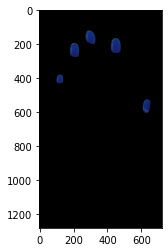

In [3]:
plt.imshow(cv2.cvtColor(out_put,cv2.COLOR_BGR2RGB));

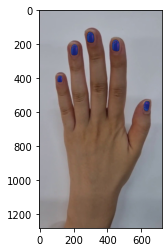

In [8]:
out_put1 = cv2.subtract(raw_hand, out_put)
for i in range(5):
    out_put1 = cv2.subtract(out_put1, out_put)
out_put2 = cv2.add(out_put1, out_put)
plt.imshow(cv2.cvtColor(out_put2,cv2.COLOR_BGR2RGB));

In [8]:
plt.imsave("test.jpg",cv2.cvtColor(out_put2,cv2.COLOR_BGR2RGB))

### 네일 이미지 모양 변환 없이 바로 합성

In [ ]:
import cv2, math, warnings
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
from nail_meta import *
warnings.filterwarnings('ignore')

for num in range(5):
    raw_mask = cv2.imread("hand_mask.jpg")
    raw_hand = cv2.imread("test.jpg")
    raw_nail_design = cv2.imread("nail_design.jpg")
    raw_nail_shape = cv2.imread("nail_shape.jpg")
    crop_list = rot_crop_box(raw_mask)
    
    dst = cv2.imread("New_design5.jpg")
    top_point, left_point, right_point, low_point = pts_box(dst)
    point1 , point2, point3, point4 = [left_point[0],top_point[1]], [right_point[0],top_point[1]], [right_point[0],low_point[1]], [left_point[0],low_point[1]]
    raw_mask_ct = Contours(raw_mask)

    dst_ct = Contours(dst)
    resized_dst = cv2.resize(dst,(raw_hand.shape[1],raw_hand.shape[0]))

    top_point, left_point, right_point, low_point = pts_box(resized_dst)
    point1 , point2, point3, point4 = [left_point[0],top_point[1]], [right_point[0],top_point[1]], [right_point[0],low_point[1]], [left_point[0],low_point[1]]

    cnt = raw_mask_ct[num]
    # Rotated Rectangle
    rect = cv2.minAreaRect(cnt)
    hand_box = cv2.boxPoints(rect)
    hand_box = np.int0(hand_box)

    rows, cols = raw_hand.shape[:2]
    final_before = np.float32([ point2 , point3, point1, point4 ])
    # 변환 후
    final_after = np.float32([hand_box[1], hand_box[2],hand_box[0],hand_box[3]])

    mtrx2 = cv2.getPerspectiveTransform(final_before, final_after)
    dst2 = cv2.warpPerspective(resized_dst, mtrx2, (cols, rows))
    output=cv2.subtract(raw_hand, dst2)
    output2 = cv2.cvtColor(cv2.add(output,dst2),cv2.COLOR_BGR2RGB)
    plt.imshow(output2);
    plt.imsave("test.jpg",output2)